Hi Matt!

Here are some things I have learned about Alex's code.

In [1]:
# Import packages
import sys, os # Access to operating system
from XmlToHoc_simple import * # To convert to hoc
from pyramidal_nxRemoveLoops import * # Remove loops
from knossos_scaleCoords import * # Scale coordinates
from pyramidal_readExportedGeometry import * # Load geo object
from pyramidal_getProperties import * # Analyze properties

### Converting your Skeleton to a .hoc file
This can take a little while. There is no loading bar, so just be veeeeeeeery patient.

In [2]:
xmlfile = "878_067_GM_(Adriane).nml"
new_hocfile = "878_067_GM_(Adriane).hoc"
_ = SkelHoc(xmlfile, new_hocfile)

Quantal distance is 64.25730 
Called Refine #3


In [3]:
# then you need to remove accidental loops
hoc_cleaned = "878_067_GM_(Adriane)_noloops.hoc"
_ = rewrite_hoc(new_hocfile, hoc_cleaned)

878_067_GM_(Adriane).hoc has 12888 nodes and 13667 edges
Should have 12887 edges
Predicts ~ 780 loops
Actually found 782 loops
New graph has 0 loops
Num edges: 12885


In [9]:
# then you need to scale the coordinates
voxel = [0.732,0.732,0.488] # (x,y,z)
load_and_fix(hoc_cleaned, voxel)

In [10]:
# then you need to load the geometry object
scaled = "878_067_GM_(Adriane)_scaled.hoc"
geo = demoReadsilent(scaled)

Number of subgraphs = 3 / size of graphs: [38, 149, 6257]
Number of subgraphs = 3 / size of graphs: [38, 149, 6257]
Removed all but largest subgraphs
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
Soma is filament_999[0].
1 axons are:
['filament_999[960]']
From soma to tips, tortuosity is 2.4 +- 1.9


### Geometry Objects
The `geometry` object contains all the relevant information from a single skeleton. The three major properties (fields) of a `geometry` object are `nodes`, `segments`, and `branches`. A segment is a linear connector between two nodes. This means that if there are `n` nodes, there will always be `n-1` segments. There exists a branch when there are `n>2` segments connecting to a single node (e.g. there is more than one single continuous path).

In [12]:
""" none of this code works"""

# Tortuosity (computed alongside path length)
paths, torts = path_lengths2(geo)
violin_spline([paths, [0], [0]], ['GM', 'l', 'l'], 
              stepfilled=False, title='Path length')
violin_spline([torts, [0], [0]], ['GM', 'l', 'l'], 
              stepfilled=False, title='Path tortuosity')

NameError: name 'violin_spline' is not defined

### Other Properties in Neuron Geometry
The best way to look at all the properties of a `geometry` object is through these following functions.
`displaySummary` returns the total number of nodes, the total number of compartments, the total number of segments, the number of connected nodes, compartments, and segments, the number of branches, the soma surface area, volume, and so on. You can enable plotting through `pyplot.show()` provided that you have imported `PyPlot` as `pyplot`.

These functions are inside of `pyramidal_NeuronGeometry.py` and require the following imports:

In [13]:
import os
from scipy import special, mean, std
from collections import deque
import matplotlib.pyplot as pyplot
from math import log, sqrt, atan, isnan, pi, acos
from bisect import bisect_left
import numpy as np

total number of nodes: 6258
total number of compartments: 6257
total number of segments: 6257
number of connected nodes: 6258
number of connected compartments: 6257
number of connected segments: 6257
number of branches: 1298
Soma Area = 0.000242078 mm^2
Found 1 axon
volume: 4.25367e-05 mm^3
surface area: 0.11343126677393532 mm^2


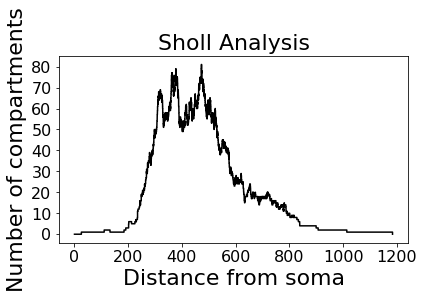

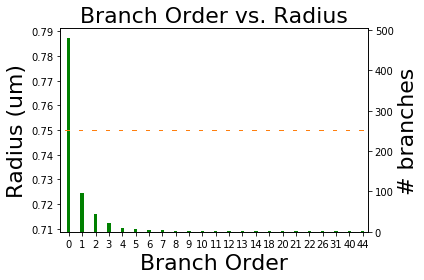

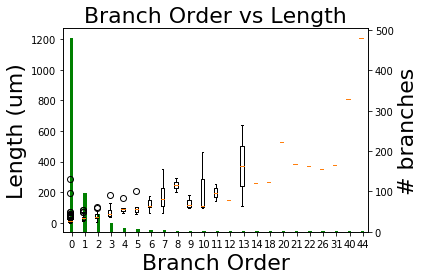

In [14]:
geo.displaySummary()

Another useful function is `getProperties`. You can output directly to a file on your computer. For example, if I want to output to `/home/marder/Documents/output.txt` then I would set `passiveFile="home/marder/Documents/output.txt"`. As expected, you can change the other properties to `True` to make them display.

In [15]:
geo.getProperties(passiveFile="",display=False,makePlots=False)

Soma is filament_999[0].
1 axons are:
['filament_999[960]']
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node segment
2-node seg

({'Area-To-Volume Ratio': 2666.6666666668143,
  'Branch Angles': [14.621143938770908,
   61.244675870337055,
   2.489552921999421,
   108.44611958797125,
   0.0,
   0.0,
   110.53083876894968,
   93.80882228971842,
   8.113683683896891,
   34.97588051291603,
   22.349220959967777,
   80.45255714859913,
   21.0907432335987,
   63.4631786142883,
   0.0,
   75.69646349007536,
   33.44711601296889,
   50.025429859414366,
   48.38277898572129,
   40.58959457314927,
   15.922779458177004,
   135.09558216562993,
   122.078793563148,
   22.619864948041112,
   49.74712002395205,
   53.130102354156335,
   0.0,
   120.54794619279322,
   47.72631099390679,
   18.74779061211485,
   38.19551968460842,
   42.27368900609474,
   119.69712517104655,
   32.68498152072569,
   90.54019779282574,
   94.71146014827858,
   0.0,
   63.47453826024105,
   26.02959219151263,
   0.0,
   62.192145062373115,
   93.3265068418034,
   83.33570672386769,
   68.58328596696673,
   39.23152048359225,
   7.30549558280502,
 

This should return all of the properties you want. You can also do just sholl analysis by

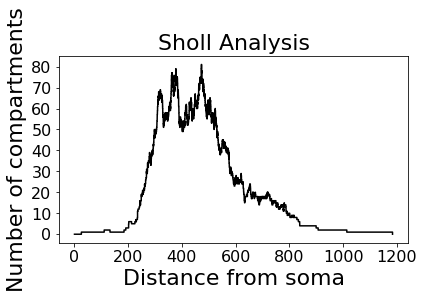

In [16]:
geo.shollAnalysis()

### A Gift for You
The function I wrote called `getNeuronCharacteristics` takes in the filename of the cleaned and scaled `.hoc` file and returns everything to a text file.

In [21]:
# this is a function I wrote for you

def getNeuronCharacteristics(scaled_hoc_file):
    geo = demoReadsilent(scaled_hoc_file)
    geo.displaySummary()
    output_file = scaled_hoc_file[:-4] + "_output.txt"
    geo.getProperties(passiveFile=output_file,display=True,makePlots=True)
    geo.shollAnalysis()
    

Number of subgraphs = 3 / size of graphs: [38, 149, 6257]
Number of subgraphs = 3 / size of graphs: [38, 149, 6257]
Removed all but largest subgraphs
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
self._axonBranches is length: 1
Soma is filament_999[0].
1 axons are:
['filament_999[960]']
From soma to tips, tortuosity is 2.4 +- 1.9
total number of nodes: 6258
total number of compartments: 6257
total number of segments: 6257
Number of subgraphs = 1 / size of graphs: [6257]
number of connected nodes: 6258
number of connected compartments: 6257
number of connected segments: 6257
number of branches: 1298
Soma Area = 0.000242078 mm^2
Found 1 axon
volume: 4.25367e-05 mm^3
surface area: 0.11343126677393532 mm^2
number of connected nodes: 6258
number of connected compartments: 6257
number of connected segments: 6257
number of branches: 1298
Surface are

ModuleNotFoundError: No module named 'neuron_simulateGeometry'

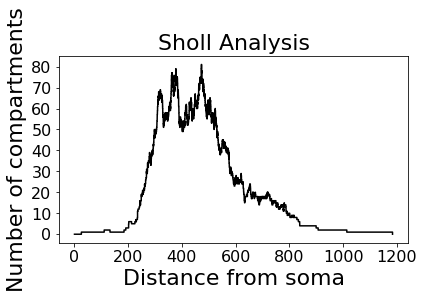

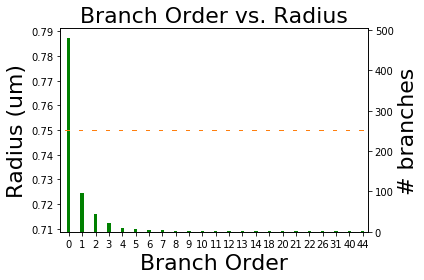

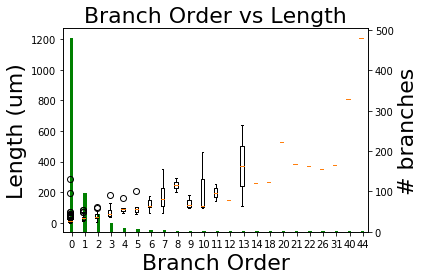

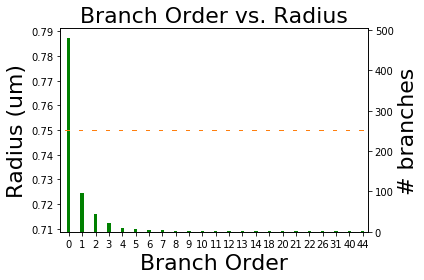

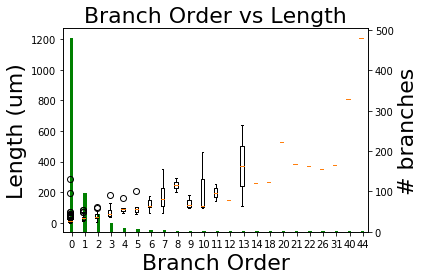

In [22]:
getNeuronCharacteristics(scaled)